In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

# Data cleaning and Pre-processing 

In [23]:
#header creation and directory paths

#usage_dir = "task_usage/"
#job_dir = "job_events/"
usage_dir = "F:\\google-cluster2011\\task_usage\\"
job_dir = "F:\\google-cluster2011\\job_events\\"
task_usage_header = ['start_time','end_time','job_id','task_index','machine_id', 'mean_cpu_usage',
                     'canon_memory_usage', 'assign_memory_usage', 'unmapped_cache', 'total_cache', 
                     'max_mem', 'mean_io', 'mean_space', 'max_cpu', 'max_io', 'cpi', 'mai', 'sample',
                     'agg_type', 'sample_cpu_usage']

job_header = ['timestamp','missing_info', 'job_id', 'event_type', 'user_name', 'scheduling_class',
              'job_name','logical_job_name']

In [3]:
#read csv - drop unused columns

import pandas as pd
final_df = pd.DataFrame()

# 3 files used for each category
for i in range(10):
    file_str = str(i).zfill(5)
    usage_df = pd.read_csv(usage_dir +"part-"+file_str+"-of-00500.csv.gz",header=None)

    usage_df.columns = task_usage_header

    job_df = pd.read_csv(job_dir +"part-"+file_str+"-of-00500.csv.gz",header=None)
    job_df.columns = job_header

    job_df.drop(['missing_info','user_name', 'scheduling_class',
                  'job_name','logical_job_name'], axis =1,inplace=True)

    usage_df.drop(['task_index','machine_id','canon_memory_usage', 'assign_memory_usage', 'unmapped_cache', 'total_cache', 
                         'max_mem', 'mean_io', 'mean_space', 'max_cpu', 'max_io', 'cpi', 'mai', 'sample',
                         'agg_type', 'sample_cpu_usage'], axis =1,inplace=True)
    print(usage_df)

    #merge to filter jobs with valid life - SCHEDULE to FINISH

    new_jobdf = pd.merge(job_df[(job_df['event_type'] == 1)],job_df[ (job_df['event_type'] == 4)], on = "job_id")
    new_jobdf.drop(['event_type_x',  'event_type_y'], axis =1,inplace=True)
    new_jobdf['life_time'] = new_jobdf['timestamp_y'] -  new_jobdf['timestamp_x']
    new_jobdf.drop(['timestamp_x',  'timestamp_y'], axis =1,inplace=True)
    #new_jobdf
    
    
    #merge to get cpu usage of jobs with valid lifetime

    n_jobdf = pd.merge(usage_df,new_jobdf, on = "job_id")
    n_jobdf['start_time'] = (n_jobdf['start_time']/1000000)
    n_jobdf['end_time'] = (n_jobdf['end_time']/1000000)
    n_jobdf['life_time'] = (n_jobdf['life_time']/1000000)

    # arrange cpu uses by jobs- add parallel cpu uses of all tasks of a jobs during a time cycle
    
    final_df = final_df.append(n_jobdf.groupby(['job_id','start_time','end_time']).sum())
final_df
final_df.dropna(axis =0, inplace = True)


         start_time    end_time      job_id  mean_cpu_usage
0         600000000   900000000     3418309        0.001562
1         600000000   900000000     3418309        0.001568
2         600000000   900000000     3418314        0.000307
3         600000000   900000000     3418314        0.000300
4         600000000   900000000     3418319        0.000461
...             ...         ...         ...             ...
2520768  5611000000  5700000000  6251995937        0.038090
2520769  5611000000  5700000000  6251995937        0.038760
2520770  5611000000  5700000000  6251995937        0.045530
2520771  5611000000  5622000000  6252018749        0.008240
2520772  5611000000  5700000000  6252020264        0.012160

[2520773 rows x 4 columns]
          start_time     end_time      job_id  mean_cpu_usage
0         5612000000   5700000000  4665712499        0.031430
1         5612000000   5700000000  4665712499        0.026980
2         5612000000   5700000000  4665896876        0.041140
3   

In [4]:
final_df.reset_index(level='start_time',inplace=True)
#######
final_df.reset_index(level='end_time',inplace=True)

# Data normalization and Binning

In [37]:
#normalising the mean cpu usage - y axis
# print(final_df.index.get_level_values(0).unique())
# for i in final_df.index.get_level_values(0).unique():


for i in final_df.index.get_level_values(0).unique():
    minn = final_df.loc[i]['mean_cpu_usage'].min()
    maxx = final_df.loc[i]['mean_cpu_usage'].max() 
    #print("minn=",minn, ",, maxx=", maxx)
    small_df = final_df[final_df.index == i]
    small_df['mean_cpu_usage'] = (small_df['mean_cpu_usage'] - minn)/(maxx-minn)
    final_df[final_df.index == i] = small_df
    final_df.loc[final_df.index == i, 'mean_cpu_usage'] = small_df
#pd.options.mode.chained_assignment = None  # default='warn'

final_df

ValueError: Incompatible indexer with DataFrame

# Sample Distribution Plots

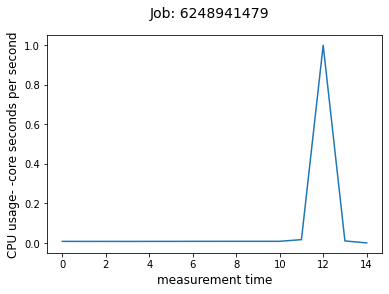

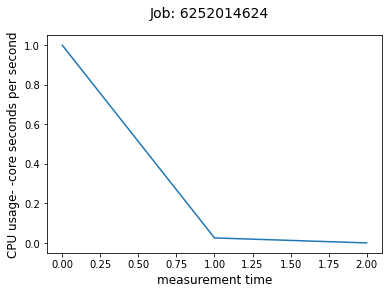

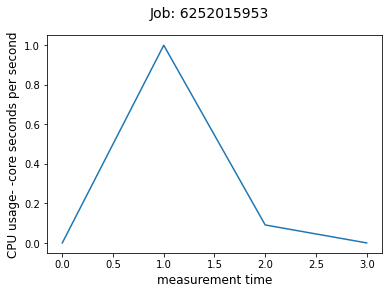

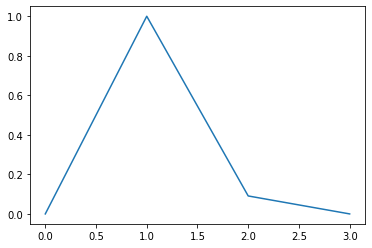

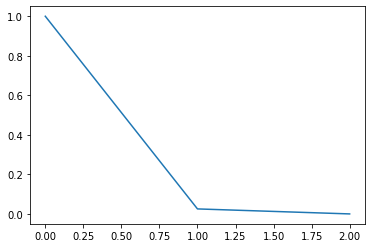

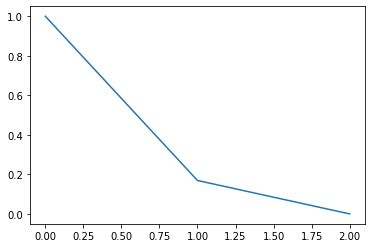

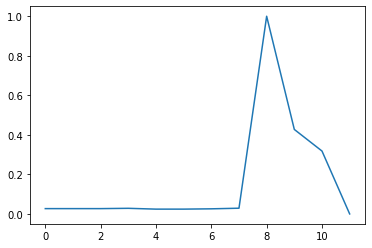

In [6]:
#5 plots of random jobs and their cpu usages

small_df = final_df[final_df.index == 6248941479]
colVals = small_df['mean_cpu_usage'].tolist()
fig = plt.figure()
plt.plot(colVals)
fig.suptitle('Job: 6248941479', fontsize=14)
plt.xlabel('measurement time', fontsize=12)
plt.ylabel('CPU usage- -core seconds per second', fontsize=12)
fig.savefig('Job: 6248941479.jpg')
plt.show()


small_df = final_df[final_df.index == 6252014624]
colVals = small_df['mean_cpu_usage'].tolist()
fig = plt.figure()
plt.plot(colVals)
fig.suptitle('Job: 6252014624', fontsize=14)
plt.xlabel('measurement time', fontsize=12)
plt.ylabel('CPU usage- -core seconds per second', fontsize=12)
fig.savefig('Job: 6252014624.jpg')
plt.show()


small_df = final_df[final_df.index == 6252015953]
colVals = small_df['mean_cpu_usage'].tolist()
fig = plt.figure()
plt.plot(colVals)
fig.suptitle('Job: 6252015953', fontsize=14)
plt.xlabel('measurement time', fontsize=12)
plt.ylabel('CPU usage- -core seconds per second', fontsize=12)
fig.savefig('Job: 6252015953.jpg')
plt.show()

small_df = final_df[final_df.index == 6252015953]
colVals = small_df['mean_cpu_usage'].tolist()
plt.plot(colVals)
plt.show()

small_df = final_df[final_df.index == 6252014624]
colVals = small_df['mean_cpu_usage'].tolist()
plt.plot(colVals)
plt.show()

small_df = final_df[final_df.index == 6252018909]
colVals = small_df['mean_cpu_usage'].tolist()
plt.plot(colVals)
plt.show()

small_df = final_df[final_df.index == 6245463804]
colVals = small_df['mean_cpu_usage'].tolist()
plt.plot(colVals)
plt.show()


In [7]:
#function to calculate values in each bin of each job's cpu uasge distribution

def calc_point(x1,y1,x2,y2,point):
    y=(point-x1)*(y2-y1)/(x2-x1)+y1
    if math.isnan(y):
        return -1000
    return y
def calculateValues(dataframe):
    my_points=[]
    start_index = 0
    next_index=1
    row0 = dataframe.iloc[start_index]
    row1 = dataframe.iloc[next_index]
    point = row0.end_time
    x1= row0.end_time
    x2= row1.end_time
    y1= row0.mean_cpu_usage
    y2= row1.mean_cpu_usage
    end_point = dataframe.iloc[dataframe.shape[0]-1].end_time
    my_points.append(y1)
#     print(point)
#     print(end_point)
    bin_size = (end_point-point)/100
#     print(bin_size)
    for i in range(100):
        point = point + bin_size
        if point > x2:
            start_index += 1
            next_index += 1
            if next_index >= dataframe.shape[0]:
                return my_points
            row0 = dataframe.iloc[start_index]
            row1 = dataframe.iloc[next_index]
            point = row0.end_time
            x1= row0.end_time
            x2= row1.end_time
            y1= row0.mean_cpu_usage
            y2= row1.mean_cpu_usage
#         print(point)
        val = calc_point(x1,y1,x2,y2,point)
        if val == -1000:
            return [-1000]
        my_points.append(val)
#     print(len(my_points))
    my_points.append(0)
    return my_points

In [8]:
#divide each lifetime into 100 bins
#get vector of all job's common usage distribution

# dummy = final_df.reset_index(level='start_time')
# dummy.reset_index(level='end_time',inplace=True)

dummy = final_df

job_ids = dummy.index.get_level_values(0).unique()
count = len(job_ids)
# job_ids
prev_point = [0]*102
for job_id in job_ids:
    #print(job_id)
    small_df = dummy[dummy.index == job_id]
    if small_df.shape[0] > 10:
        ponts = calculateValues(small_df)
#         print(ponts)
        if ponts[0] != -1000:
            prev_point = [x + y for x, y in zip(prev_point, ponts)]
#         print(len(prev_point))
#     print(small_df)
#final_df.index.unique().shape[0]
newList = [x / count for x in prev_point]

C:\Users\lenovo\AppData\Local\Temp/ipykernel_12300/1724354248.py:4: RuntimeWarning: invalid value encountered in double_scalars
  y=(point-x1)*(y2-y1)/(x2-x1)+y1


# Hypothesis testing- KS Test

In [9]:
#vector of mean of all the distribution - 100 values
newList

[0.00288779702122919,
 0.005596395511027189,
 0.007109756362602586,
 0.007904303157385086,
 0.008370133783137676,
 0.008715513494472145,
 0.00901815706142132,
 0.009267601921668709,
 0.00928129130841654,
 0.009167148410525027,
 0.00914782965371047,
 0.009122542837955215,
 0.009033477116970978,
 0.008989937470547495,
 0.008891818338595127,
 0.008889171762098443,
 0.008719921223039297,
 0.008660839268592065,
 0.008550833875437905,
 0.008400017068185864,
 0.008316051802016193,
 0.008302328221040411,
 0.008315158061115737,
 0.008236233595626327,
 0.007979302945706025,
 0.007951940700033282,
 0.007961888285562706,
 0.007972221957271439,
 0.007799357489286218,
 0.007834725140633313,
 0.007819445292123143,
 0.007852894506514689,
 0.007896859510335658,
 0.007963216256408412,
 0.008038608207603022,
 0.007973301974670352,
 0.007939072597725848,
 0.007925164283389616,
 0.007950258789998879,
 0.007966488168376987,
 0.007868527257779987,
 0.007823584272416981,
 0.007846192963154235,
 0.007846349400

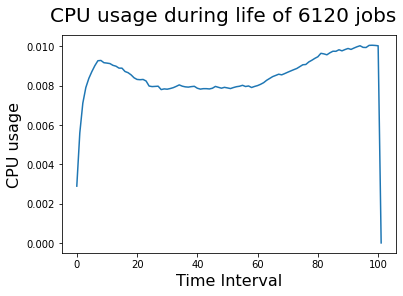

In [10]:
#plot graph of mean usage distribution



fig = plt.figure()
plt.plot(newList)
fig.suptitle('CPU usage during life of 6120 jobs', fontsize=20)
plt.xlabel('Time Interval', fontsize=16)
plt.ylabel('CPU usage', fontsize=16)
fig.savefig('test.jpg')
plt.show()



In [11]:
#K_S test to see if this vector comes from a normal distribution

#print(newList)
val =stats.kstest(newList, 'norm')
val

KstestResult(statistic=0.5, pvalue=4.183708972561233e-24)